In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [55]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [33]:
df_train = pd.read_excel("./dataset/dataset_model_input/train.xlsx",index_col=0)
df_test = pd.read_excel("./dataset/dataset_model_input/test.xlsx",index_col=0)

In [ ]:
df_train = df_train.drop(['회사명', '거래소코드', '회계년도','K2_부실판단', '산업위험_경기민감도', '표준산업분류_중분류','주거래은행'],axis=1)
df_test = df_test.drop(['회사명', '거래소코드', '회계년도','K2_부실판단', '산업위험_경기민감도', '표준산업분류_중분류','주거래은행'],axis=1)

In [37]:
y_train = df_train["Target"].reset_index(drop=True)
x_train = df_train.drop("Target",axis=True)

In [39]:
y_test = df_test["Target"].reset_index(drop=True)
x_test = df_test.drop("Target",axis=True)

In [41]:
train_scale = df_train[['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)', '유동부채비율(%)', '차입금의존도(%)',
    '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)', '이자보상배율(이자비용)(배)',
    '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)', '경영자본순이익률(%)', '매출액순이익률(%)',
    '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)', '매출액정상영업이익률(%)', '금융비용부담률(%)',
    '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)', '재고자산회전률(배)', '유형자산회전율(배)',
    '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)', '유동자산증가율(%)', '매출액증가율(%)',
    '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)', 'PPI(2015기준)', '실질GDP성장률(%)',
    'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR', 'PCR', 'CASH FLOW 대 부채비율(%)',
    '총자본투자효율(%)', 'log_평균총자산', 'K2_score', '최대주주특수관계인_지분율(%)',
    '최대주주변경횟수(회)', '감사법인변경횟수(회)', '업력(년)', '평균근속연수(년)',
    '직원수증감율(%)', '기간제비율(%)', 'R&D집중도(%)']]

In [42]:
test_scale = df_test[['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)', '유동부채비율(%)', '차입금의존도(%)',
    '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)', '이자보상배율(이자비용)(배)',
    '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)', '경영자본순이익률(%)', '매출액순이익률(%)',
    '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)', '매출액정상영업이익률(%)', '금융비용부담률(%)',
    '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)', '재고자산회전률(배)', '유형자산회전율(배)',
    '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)', '유동자산증가율(%)', '매출액증가율(%)',
    '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)', 'PPI(2015기준)', '실질GDP성장률(%)',
    'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR', 'PCR', 'CASH FLOW 대 부채비율(%)',
    '총자본투자효율(%)', 'log_평균총자산', 'K2_score', '최대주주특수관계인_지분율(%)',
    '최대주주변경횟수(회)', '감사법인변경횟수(회)', '업력(년)', '평균근속연수(년)',
    '직원수증감율(%)', '기간제비율(%)', 'R&D집중도(%)']]

In [43]:
train_not_scale = df_train[['수출기업여부(dummy)', '주거래은행_0', '주거래은행_1',
    '주거래은행_2', '주거래은행_3', '주거래은행_4', '산업위험_경기민감도_카테고리화_1안_AA',
    '산업위험_경기민감도_카테고리화_1안_A_BB', '산업위험_경기민감도_카테고리화_1안_BBB',
    '산업위험_경기민감도_카테고리화_2안_AA', '산업위험_경기민감도_카테고리화_2안_A_B',
    '산업위험_경기민감도_카테고리화_2안_BB_BBB', '최대주주변경횟수(회)_카테고리화_1안_0회',
    '최대주주변경횟수(회)_카테고리화_1안_1~3회', '최대주주변경횟수(회)_카테고리화_1안_4회이상',
    '최대주주변경횟수(회)_카테고리화_2안_0~1회', '최대주주변경횟수(회)_카테고리화_2안_2~4회',
    '최대주주변경횟수(회)_카테고리화_2안_5회이상', '감사법인변경횟수(회)_카테고리화_1안_0회',
    '감사법인변경횟수(회)_카테고리화_1안_1~2회', '감사법인변경횟수(회)_카테고리화_1안_3회이상',
    '감사법인변경횟수(회)_카테고리화_2안_0회', '감사법인변경횟수(회)_카테고리화_2안_1회이상',
    '장단기금리차_추세_1안_감소', '장단기금리차_추세_1안_증가', '장단기금리차_추세_2안_-',
    '장단기금리차_추세_2안_역전', '생산자물가지수_추세_감소', '생산자물가지수_추세_증가', '실질GDP성장_추세_감소',
    '실질GDP성장_추세_증가', '산업위험_경기민감도_A', '산업위험_경기민감도_AA', '산업위험_경기민감도_B',
    '산업위험_경기민감도_BB', '산업위험_경기민감도_BBB', 'K2_부실판단_건전판정', 'K2_부실판단_부실가능',
    'K2_부실판단_판정보류']]

In [44]:
test_not_scale = df_test[['수출기업여부(dummy)', '주거래은행_0', '주거래은행_1',
    '주거래은행_2', '주거래은행_3', '주거래은행_4', '산업위험_경기민감도_카테고리화_1안_AA',
    '산업위험_경기민감도_카테고리화_1안_A_BB', '산업위험_경기민감도_카테고리화_1안_BBB',
    '산업위험_경기민감도_카테고리화_2안_AA', '산업위험_경기민감도_카테고리화_2안_A_B',
    '산업위험_경기민감도_카테고리화_2안_BB_BBB', '최대주주변경횟수(회)_카테고리화_1안_0회',
    '최대주주변경횟수(회)_카테고리화_1안_1~3회', '최대주주변경횟수(회)_카테고리화_1안_4회이상',
    '최대주주변경횟수(회)_카테고리화_2안_0~1회', '최대주주변경횟수(회)_카테고리화_2안_2~4회',
    '최대주주변경횟수(회)_카테고리화_2안_5회이상', '감사법인변경횟수(회)_카테고리화_1안_0회',
    '감사법인변경횟수(회)_카테고리화_1안_1~2회', '감사법인변경횟수(회)_카테고리화_1안_3회이상',
    '감사법인변경횟수(회)_카테고리화_2안_0회', '감사법인변경횟수(회)_카테고리화_2안_1회이상',
    '장단기금리차_추세_1안_감소', '장단기금리차_추세_1안_증가', '장단기금리차_추세_2안_-',
    '장단기금리차_추세_2안_역전', '생산자물가지수_추세_감소', '생산자물가지수_추세_증가', '실질GDP성장_추세_감소',
    '실질GDP성장_추세_증가', '산업위험_경기민감도_A', '산업위험_경기민감도_AA', '산업위험_경기민감도_B',
    '산업위험_경기민감도_BB', '산업위험_경기민감도_BBB', 'K2_부실판단_건전판정', 'K2_부실판단_부실가능',
    'K2_부실판단_판정보류']]

In [45]:
# StandardScaler 객체 생성
scaler = StandardScaler()
# 학습 세트를 사용하여 스케일링
x_train_scaled = scaler.fit_transform(train_scale)
# 테스트 세트에도 동일한 스케일링 적용
x_test_scaled = scaler.transform(test_scale)

In [47]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=train_scale.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=test_scale.columns)

In [50]:
x_train_scaled = pd.concat([x_train_scaled, train_not_scale],axis=1)
x_test_scaled = pd.concat([x_test_scaled, test_not_scale],axis=1)

In [59]:
def draw_qq(box_q_df):
    num_cols = len(box_q_df.columns)
    num_rows = (num_cols + 1) // 7  # 컬럼 개수에 따라 subplot 행 개수 계산

    fig, axes = plt.subplots(num_rows, 7, figsize=(30, 30))

    # 반복문으로 모든 컬럼의 QQ plot 그리기
    for i, col in enumerate(box_q_df.columns):
        row_idx = i // 7
        col_idx = i % 7
        ax = axes[row_idx, col_idx]
        stats.probplot(box_q_df[col], dist=stats.norm, plot=ax)
        ax.set_title(f'QQ plot of {col}')

    # 남은 비어있는 subplot 제거
    if num_cols % 7 != 0:
        fig.delaxes(axes.flatten()[-1])
    
    plt.tight_layout()
    plt.show()

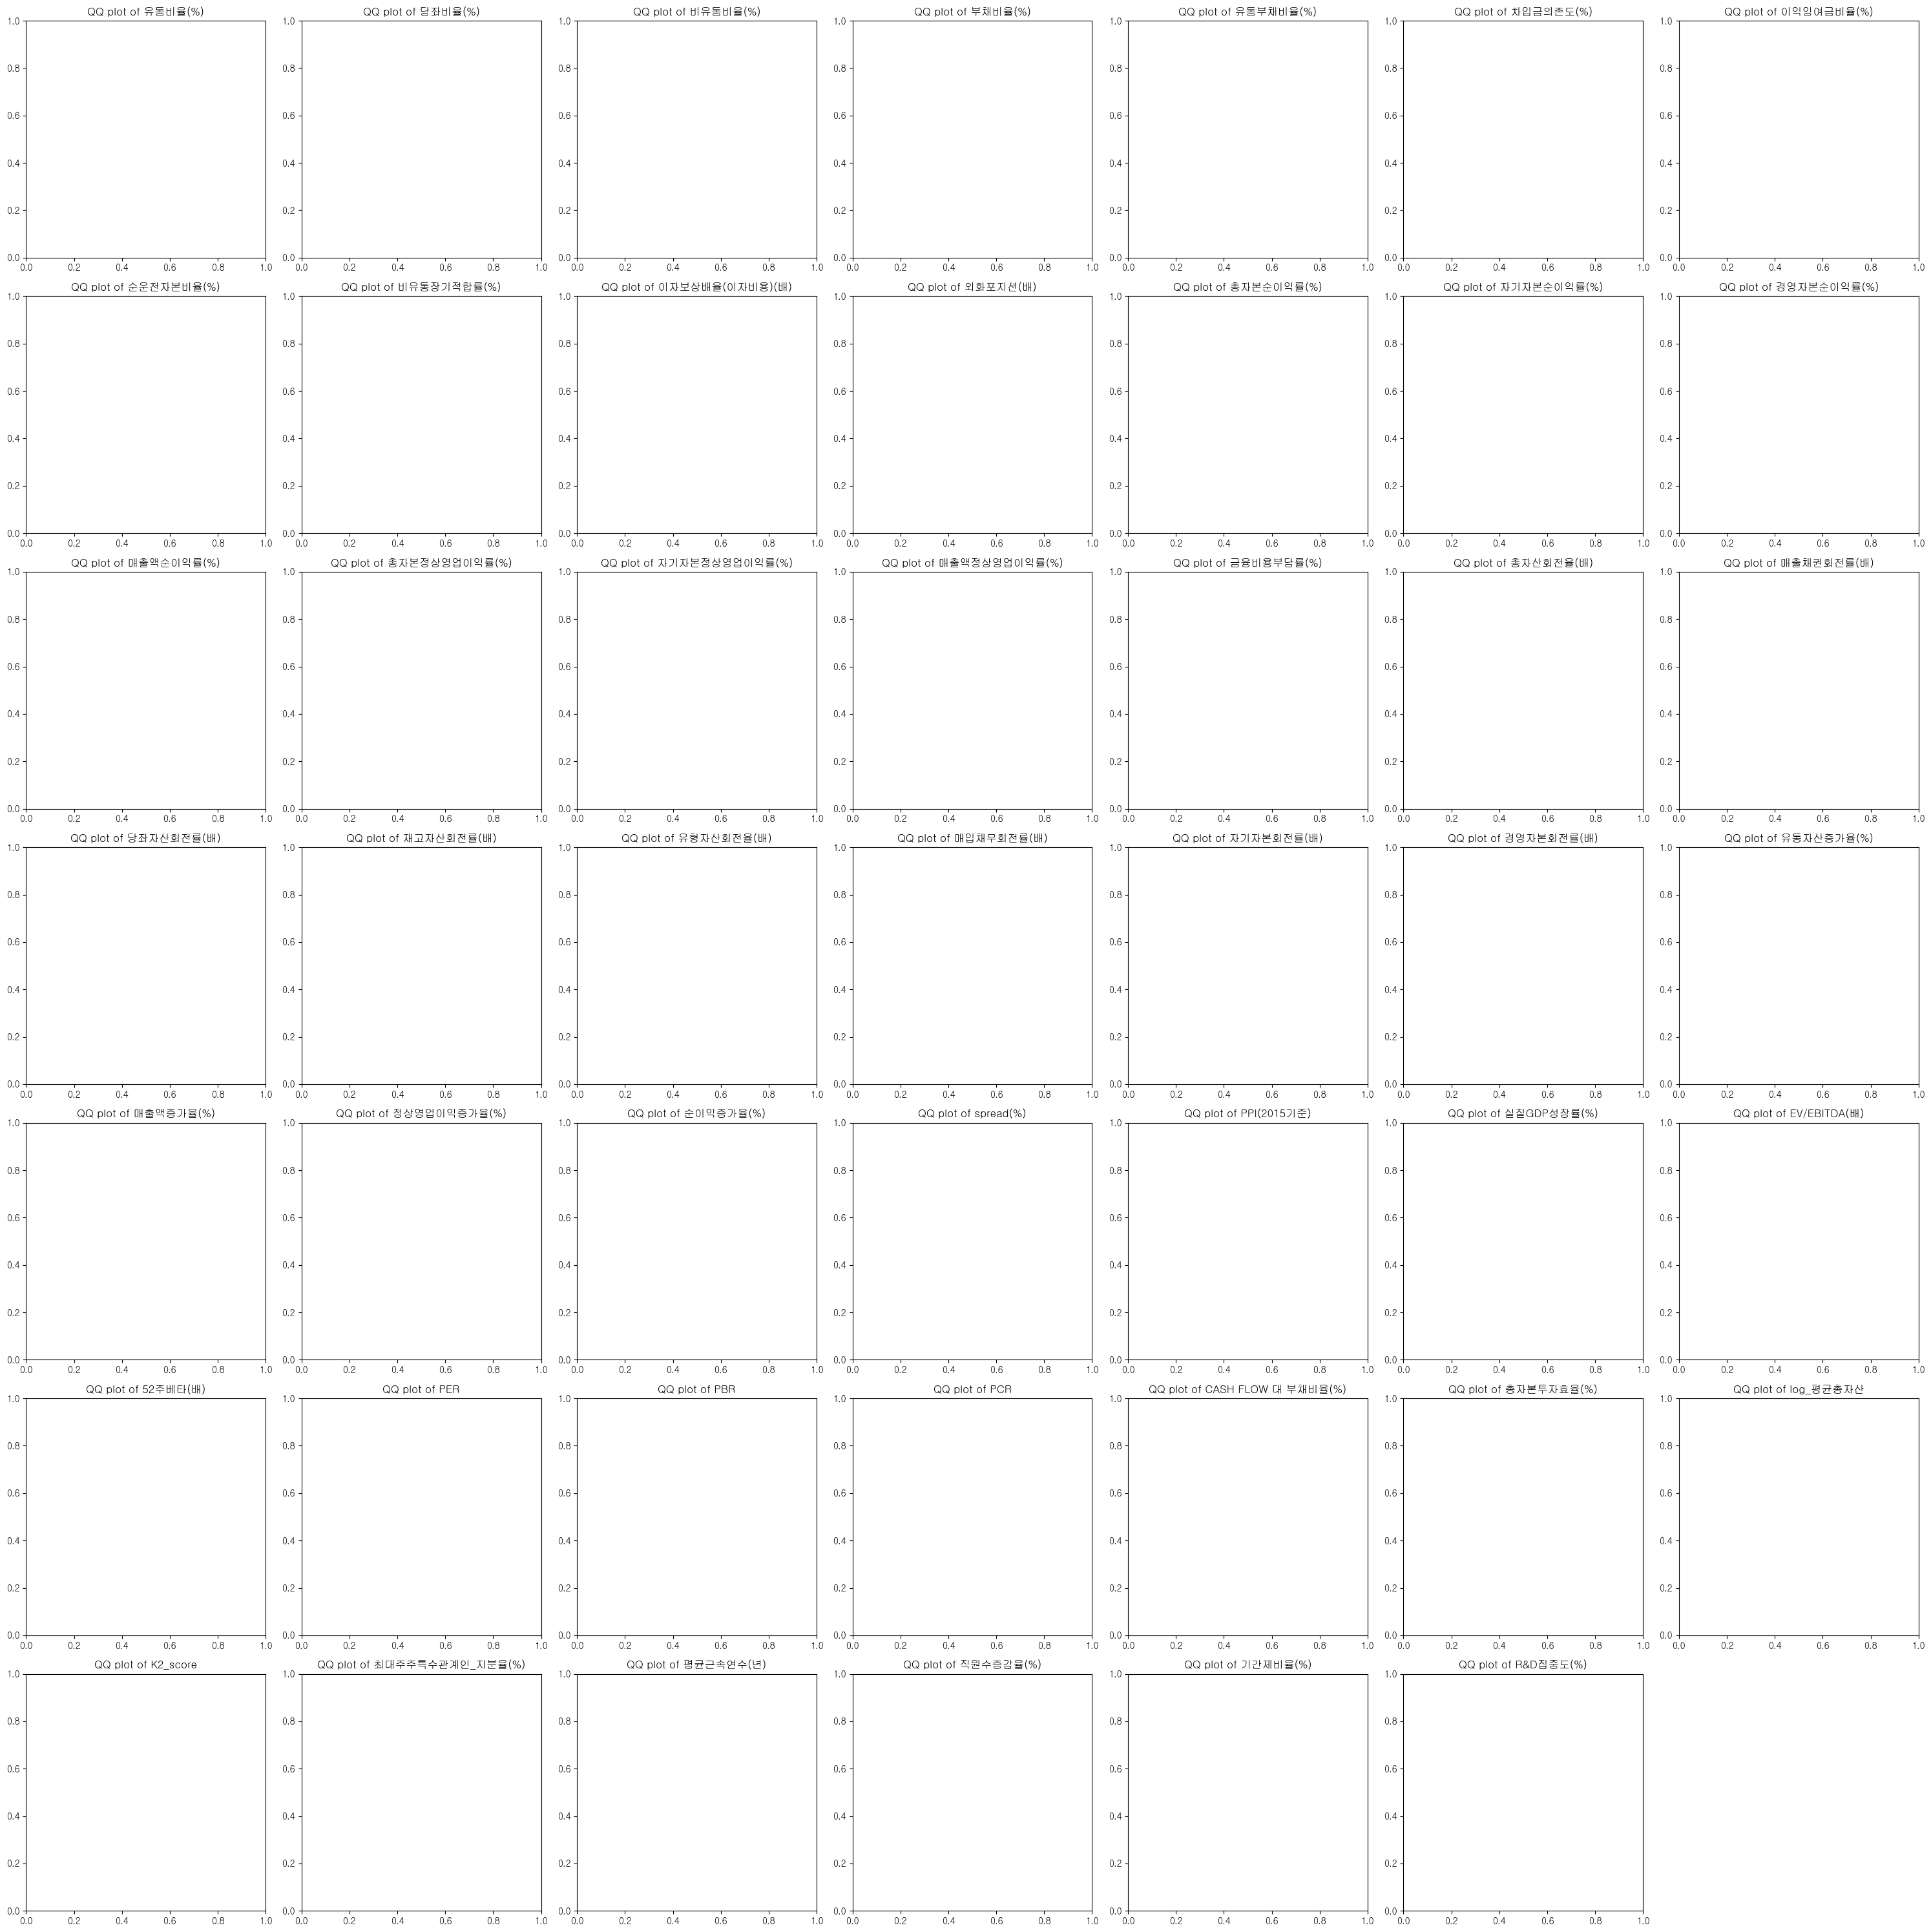

In [60]:
draw_qq(x_train_scaled[['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)', '유동부채비율(%)', '차입금의존도(%)',
    '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)', '이자보상배율(이자비용)(배)',
    '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)', '경영자본순이익률(%)', '매출액순이익률(%)',
    '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)', '매출액정상영업이익률(%)', '금융비용부담률(%)',
    '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)', '재고자산회전률(배)', '유형자산회전율(배)',
    '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)', '유동자산증가율(%)', '매출액증가율(%)',
    '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)', 'PPI(2015기준)', '실질GDP성장률(%)',
    'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR', 'PCR', 'CASH FLOW 대 부채비율(%)',
    '총자본투자효율(%)', 'log_평균총자산', 'K2_score', '최대주주특수관계인_지분율(%)', '평균근속연수(년)',
    '직원수증감율(%)', '기간제비율(%)', 'R&D집중도(%)']])

### OverSampling

#### SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [17]:
y_train_smote.value_counts()

0    6699
1    6699
Name: Target, dtype: int64

> categorical 피처를 포함하고 있는 경우에 수행할 수 있는 오버샘플링

> Synthetic Minority Over-sampling Technique for Nominal and Continuous.

> Unlike SMOTE, SMOTE-NC for dataset containing numerical and categorical features. However, it is not designed to work with only categorical features.

In [ ]:
# from imblearn.over_sampling import SMOTENC
# sm_cat = SMOTENC(random_state=0)
# x_train_smote_cat, y_train_smote_cat = sm_cat.fit_sample(catrgorical_features=[], categorical_encoder="", x_train, y_train)

#### ADASYN

In [ ]:
# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN(random_state=0)
# x_train_ad, y_train_ad = adasyn.fit_resample(x_train, y_train)

### OverSampling by CGAN

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # CGAN 생성자 모델 정의
# def build_generator(latent_dim, num_classes, categorical_dim):
#     noise = layers.Input(shape=(latent_dim,))
#     label = layers.Input(shape=(1,))
#     categorical_input = layers.Input(shape=(categorical_dim,))
    
#     label_embedding = layers.Embedding(num_classes, latent_dim)(label)
#     label_embedding = layers.Flatten()(label_embedding)
#     merged = layers.Concatenate()([noise, label_embedding, categorical_input])
    
#     x = layers.Dense(256, activation='relu')(merged)
#     generated_data = layers.Dense(numeric_feature_dim + categorical_dim, activation='tanh')(x)
    
#     return models.Model([noise, label, categorical_input], generated_data)

# # CGAN 판별자 모델 정의
# def build_discriminator(input_shape, num_classes, categorical_dim):
#     data = layers.Input(shape=input_shape)
#     label = layers.Input(shape=(1,))
#     categorical_input = layers.Input(shape=(categorical_dim,))
    
#     label_embedding = layers.Embedding(num_classes, np.prod(input_shape))(label)
#     label_embedding = layers.Flatten()(label_embedding)
    
#     merged = layers.Concatenate()([data, label_embedding, categorical_input])
    
#     x = layers.Dense(512, activation='relu')(merged)
#     validity = layers.Dense(1, activation='sigmoid')(x)
    
#     return models.Model([data, label, categorical_input], validity)

# # numeric, categorical 변수 개수(차원)
# numeric_feature_dim = 1 # 숫자형 변수 개수
# categorical_dim = 5 # 범주형 변수 개수

# # Target 분류 개수
# num_classes = 2
# num_samples_per_class = 100
# num_samples_total = num_classes * num_samples_per_class

# # 하이퍼파라미터 설정
# latent_dim = 100

# # 생성자와 판별자 모델 빌드
# generator = build_generator(latent_dim, num_classes, categorical_dim)
# discriminator = build_discriminator((numeric_feature_dim + categorical_dim,), num_classes, categorical_dim)

# # 판별자는 학습하지 않도록 설정 (오버샘플링에 사용할 생성자만 학습)
# discriminator.trainable = False

# # CGAN 모델 구성 (생성자와 판별자 결합)
# noise = np.random.normal(0, 1, (num_samples_total, latent_dim))
# labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes)
# categorical_data_input = np.concatenate([categorical_data, labels_one_hot], axis=1)

# # 모델 컴파일
# generator.compile(loss='binary_crossentropy', optimizer='adam')
# discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# # 오버샘플링을 위한 CGAN 학습
# epochs = 20000
# batch_size = 64

# for epoch in range(epochs):
#     # 무작위한 노이즈 생성
#     noise = np.random.normal(0, 1, (num_samples_total, latent_dim))

#     # 오버샘플링 데이터 생성
#     generated_data = generator.predict([noise, labels, categorical_data])

#     # 판별자에 의해 오버샘플링 데이터 구분
#     real_labels = np.ones(num_samples_total)
#     fake_labels = np.zeros(num_samples_total)
    
#     d_loss_real = discriminator.train_on_batch([numeric_data, labels, categorical_data], real_labels)
#     d_loss_fake = discriminator.train_on_batch([generated_data, labels, categorical_data], fake_labels)
#     d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#     # 생성자에 의해 오버샘플링 데이터 생성 및 판별자 속이기
#     valid_labels = np.ones(num_samples_total)
#     g_loss = generator.train_on_batch([noise, labels, categorical_data], valid_labels)

#     # 일정 간격으로 오버샘플링 결과 출력
#     if epoch % 1000 == 0:
#         print(f"Epoch: {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")
